# aitools examples

## mlearn.classify: Predicting pirate attack success with different classifiers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


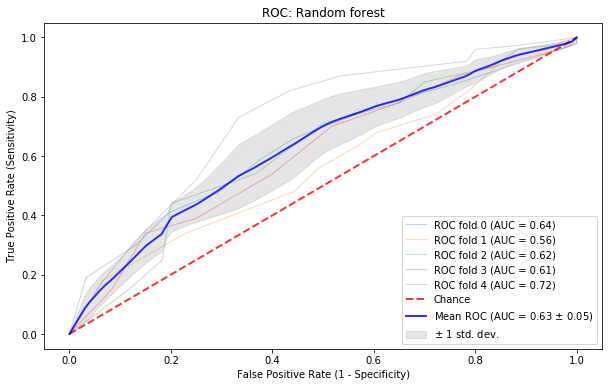

Random forest: Holdout AUC score: 0.577

Random forest: Holdout classification report:
               precision    recall  f1-score   support

           0       0.49      0.43      0.46       100
           1       0.63      0.68      0.65       141

   micro avg       0.58      0.58      0.58       241
   macro avg       0.56      0.56      0.56       241
weighted avg       0.57      0.58      0.57       241



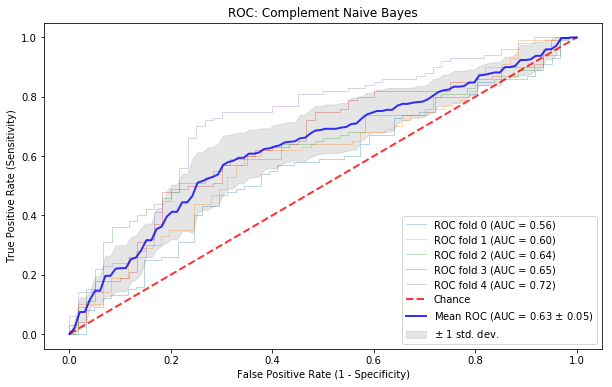

Complement Naive Bayes: Holdout AUC score: 0.660

Complement Naive Bayes: Holdout classification report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       100
           1       0.73      0.67      0.70       141

   micro avg       0.66      0.66      0.66       241
   macro avg       0.65      0.66      0.65       241
weighted avg       0.67      0.66      0.66       241



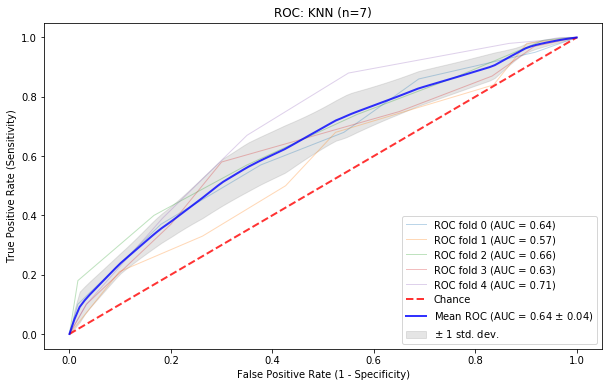

KNN (n=7): Holdout AUC score: 0.631

KNN (n=7): Holdout classification report:
               precision    recall  f1-score   support

           0       0.58      0.39      0.47       100
           1       0.65      0.80      0.72       141

   micro avg       0.63      0.63      0.63       241
   macro avg       0.62      0.60      0.59       241
weighted avg       0.62      0.63      0.61       241



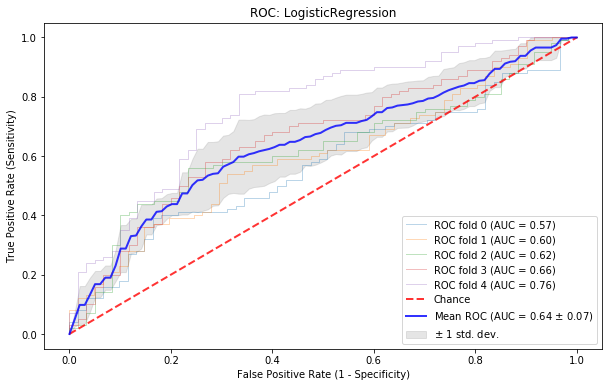

LogisticRegression: Holdout AUC score: 0.643

LogisticRegression: Holdout classification report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.59       100
           1       0.71      0.67      0.69       141

   micro avg       0.64      0.64      0.64       241
   macro avg       0.64      0.64      0.64       241
weighted avg       0.65      0.64      0.64       241



In [2]:
%load_ext autoreload
%autoreload

from aitools import mlearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', category= FutureWarning)

df_pirate = pd.read_csv('data/pirate_data.csv')

# Define numeric and categorical fea<tures 
numeric_features = ['LAT', 'LONG', 'ATTACKS']
categorical_features = ['REGION', 'COUNTRY', 'VESSEL TYPE', 'VESSEL ACTIVITY LOCATION', 
                        'TIMEZONE', 'TIME OF DAY']

X = df_pirate[numeric_features + categorical_features]
y = df_pirate['ATTACK SUCCESS']

# Test classifiers
classifiers = {
    'Random forest': RandomForestClassifier(),
    'Complement Naive Bayes': ComplementNB(),
    'KNN (n=7)': KNeighborsClassifier(n_neighbors=7),
    'LogisticRegression': LogisticRegression(solver='liblinear', class_weight='balanced'),
}

df_scores = pd.DataFrame(columns=['AUC holdout score'])
for name, classifier in classifiers.items():
    _, auc_score = mlearn.classify(name, classifier, X, y, categorical_features, numeric_features)
    df_scores.loc[name, 'AUC holdout score'] = auc_score

In [11]:
df_scores.sort_values('AUC holdout score', ascending=False)

,AUC holdout score
Complement Naive Bayes,0.659751
LogisticRegression,0.643154
KNN (n=7),0.630705
Random forest,0.60166


## plot: Plot numeric and categorical features against the target variable.

These plots can be helpful for identifying which features are most helpful for classifying the target variable.

In [3]:
%load_ext autoreload
%autoreload

from aitools import plot
import pandas as pd

df_pirate = pd.read_csv('data/pirate_data.csv')

# Define numeric and categorical fea<tures 
target = 'ATTACK SUCCESS'
numeric_features = ['LAT', 'LONG', 'ATTACKS']
categorical_features = ['REGION', 'COUNTRY', 'VESSEL TYPE', 'VESSEL ACTIVITY LOCATION', 
                        'TIMEZONE', 'TIME OF DAY']

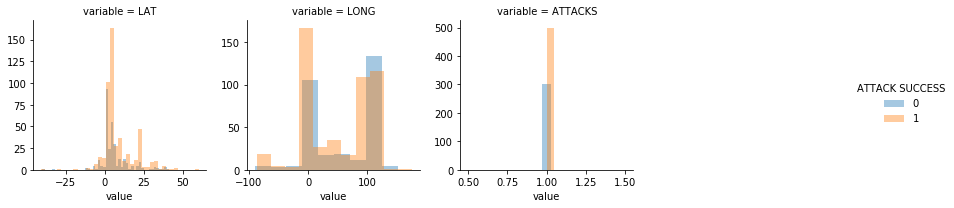

In [4]:
plot.facet_numeric(df_pirate, numeric_features, target)

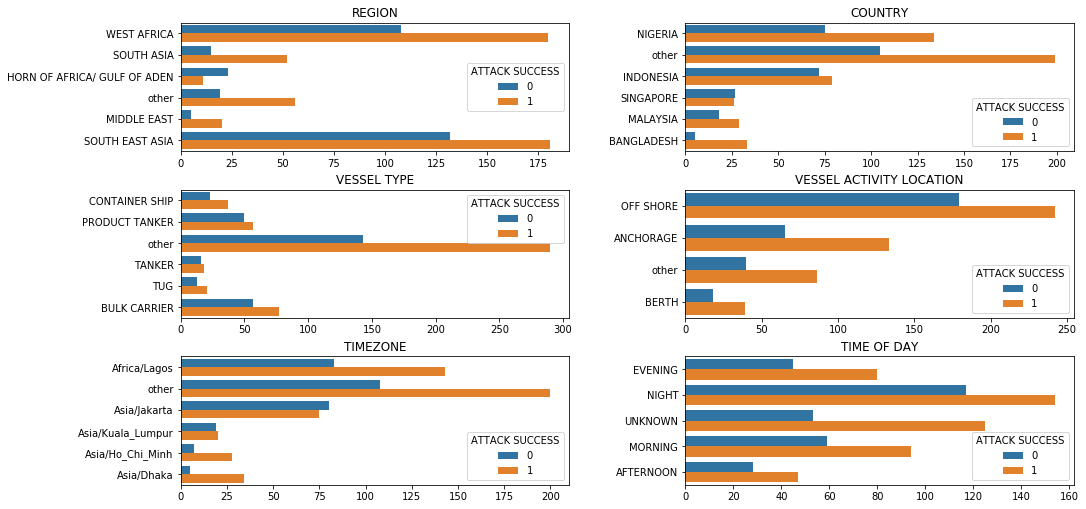

In [14]:
plot.facet_categorical(df_pirate, categorical_features, target, n_largest=5)